In [8]:
import tensorflow as tf
from tensorflow.keras import Model
from tensorflow.keras.layers import Input,Dense
from tensorflow.keras.applications.vgg16 import VGG16


(x_train,y_train),(x_test,y_test)=tf.keras.datasets.cifar10.load_data()
x_train = x_train/255.
x_test = x_test/255.
x_train.shape

(50000, 32, 32, 3)

In [14]:
#vgg预训练模型

#输入层
model_input=Input(shape=(32,32,3))
#隐藏层
vgg=VGG16(weights='imagenet',include_top=False,pooling='avg')#进行训练得到权重文件的数据集，是否包括vgg16模型的输出层，模型中池化的方式
#输出层
out=Dense(10,activation='softmax')

vgg_out=vgg(model_input)
y=out(vgg_out)
model = Model(inputs=model_input,outputs=y)



In [15]:
model.compile(optimizer='adam',
               loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])

In [17]:
model.fit(x_train,y_train,
           batch_size=32,
           validation_data=(x_test,y_test),
           validation_freq=1,
           epochs=5)

Epoch 1/5
1563/1563 [==============================] - 34s 22ms/step - loss: 0.2643 - accuracy: 0.9163 - val_loss: 0.8820 - val_accuracy: 0.7810
Epoch 2/5
1563/1563 [==============================] - 34s 22ms/step - loss: 0.3576 - accuracy: 0.8880 - val_loss: 0.8068 - val_accuracy: 0.7901
Epoch 3/5
1563/1563 [==============================] - 34s 22ms/step - loss: 0.2234 - accuracy: 0.9287 - val_loss: 0.8633 - val_accuracy: 0.7929
Epoch 4/5
1563/1563 [==============================] - 34s 22ms/step - loss: 0.2155 - accuracy: 0.9316 - val_loss: 0.9804 - val_accuracy: 0.7844
Epoch 5/5
1563/1563 [==============================] - 34s 22ms/step - loss: 0.2857 - accuracy: 0.9112 - val_loss: 0.8885 - val_accuracy: 0.7864


In [18]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_7 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 vgg16 (Functional)          (None, 512)               14714688  
                                                                 
 dense_3 (Dense)             (None, 10)                5130      
                                                                 
Total params: 14,719,818
Trainable params: 14,719,818
Non-trainable params: 0
_________________________________________________________________


In [42]:
import cv2
import numpy as np

In [99]:
x_train = []
y_train = []
with open('./flower/train_shuffle.txt','r') as f:
    for i in f.readlines():
        i = i.strip('\n')
        img_name = i.split(" ")[0]
        img_lable = int(i.split(" ")[-1])
        img_path = "./flower/train/" + img_name
        img = cv2.imread(img_path)
        img = cv2.resize(img,(32,32))
        x_train.append(img)
        y_train.append([img_lable])
    

In [111]:
x_train = np.array(x_train)
y_train = np.array(y_train)

In [101]:
x_test = []
y_test = []
with open('./flower/test_shuffle.txt','r') as f:
    for i in f.readlines():
        i = i.strip('\n')
        img_name = i.split(" ")[0]
        img_lable = int(i.split(" ")[-1])
        img_path = "./flower/test/" + img_name
        img = cv2.imread(img_path)
        img = cv2.resize(img,(32,32))
        x_test.append(img)
        y_test.append([img_lable])

In [102]:
x_test = np.array(x_test)
y_test = np.array(y_test)

In [113]:
x_train = x_train/255.
x_test = x_test/255.
x_train = x_train*2-1
x_test = x_test*2-1

In [114]:
#vgg预训练模型

#输入层
model_input=Input(shape=(32,32,3))
#隐藏层
vgg=VGG16(weights='imagenet',include_top=False,pooling='avg')#进行训练得到权重文件的数据集，是否包括vgg16模型的输出层，模型中池化的方式
#输出层
out=Dense(10,activation='softmax')

vgg_out=vgg(model_input)
y=out(vgg_out)
model = Model(inputs=model_input,outputs=y)

In [115]:
model.compile(optimizer='adam',
               loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])

In [120]:
history = model.fit(x_train,y_train,
           batch_size=32,
           validation_data=(x_test,y_test),
           validation_freq=1,
           epochs=5)

Epoch 1/5
109/109 [==============================] - 3s 23ms/step - loss: 1.6085 - accuracy: 0.2261 - val_loss: 1.6001 - val_accuracy: 0.2444
Epoch 2/5
109/109 [==============================] - 2s 23ms/step - loss: 1.6092 - accuracy: 0.2336 - val_loss: 1.5993 - val_accuracy: 0.2373
Epoch 3/5
109/109 [==============================] - 2s 22ms/step - loss: 1.6081 - accuracy: 0.2296 - val_loss: 1.6086 - val_accuracy: 0.2444
Epoch 4/5
109/109 [==============================] - 2s 22ms/step - loss: 1.6101 - accuracy: 0.2281 - val_loss: 1.6036 - val_accuracy: 0.2444
Epoch 5/5
109/109 [==============================] - 2s 22ms/step - loss: 1.6043 - accuracy: 0.2394 - val_loss: 1.6064 - val_accuracy: 0.2444


In [121]:
model.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_17 (InputLayer)       [(None, 32, 32, 3)]       0         
                                                                 
 vgg16 (Functional)          (None, 512)               14714688  
                                                                 
 dense_8 (Dense)             (None, 10)                5130      
                                                                 
Total params: 14,719,818
Trainable params: 14,719,818
Non-trainable params: 0
_________________________________________________________________


In [122]:
test_loss,test_acc = model.evaluate(x_test,y_test)
print('test-loss===>',test_loss)
print('test-acc===>',test_acc)

27/27 [==============================] - 0s 6ms/step - loss: 1.6064 - accuracy: 0.2444
test-loss===> 1.6064014434814453
test-acc===> 0.24439197778701782


In [123]:
train_loss,train_acc = model.evaluate(x_train,y_train)
print('train-loss===>',train_loss)
print('train-acc===>',train_acc)

109/109 [==============================] - 1s 7ms/step - loss: 1.6074 - accuracy: 0.2431
train-loss===> 1.6074249744415283
train-acc===> 0.2430955171585083


In [124]:
loss = history.history['loss']
accuracy = history.history['accuracy']
val_loss = history.history['val_loss']
val_accuracy = history.history['val_accuracy']

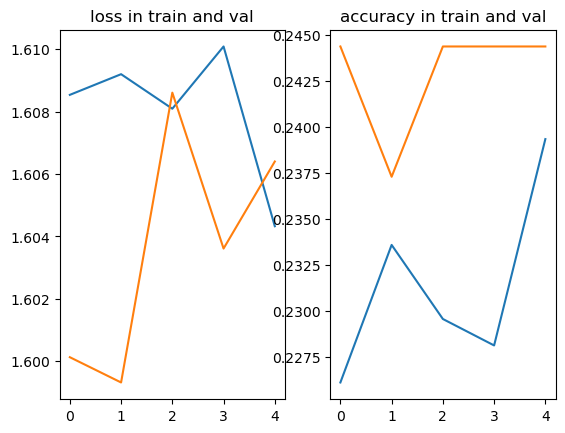

In [125]:
import matplotlib.pyplot as plt

plt.subplot(1,2,1)
plt.plot(loss)
plt.plot(val_loss)
plt.title("loss in train and val")

plt.subplot(1,2,2)
plt.plot(accuracy)
plt.plot(val_accuracy)
plt.title("accuracy in train and val")

plt.show()